In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 데이터 파일 경로 지정
file_path = "./data/chipotle.tsv"

# 탭으로 구분된 tsv 파일을 읽어와 chipo 변수에 저장
chipo = pd.read_csv(file_path, sep='\t')

print(chipo.shape)
print("-" * 50)
print(chipo.info())

(4622, 5)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [15]:
# chipo 데이터프레임의 처음 10개 행을 출력
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [16]:
print(chipo.columns)
print('-' * 50)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
--------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [17]:
 # 'order_id' 열의 데이터 타입을 문자열로 변환
chipo['order_id'] = chipo['order_id'].astype(str)

# 데이터프레임의 기술통계를 출력합니다.
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [18]:
# 'order_id' 열의 고유한 값의 개수를 출력합니다.
print(len(chipo['order_id'].unique()))

# 'item_name' 열의 고유한 값의 개수를 출력합니다.
print(len(chipo['item_name'].unique()))

1834
50


In [19]:
# 'item_name' 열의 각 항목의 빈도수를 계산하고 상위 10개를 선택합니다.
item_count = chipo['item_name'].value_counts()[:10]

# 상위 10개 항목의 순서와 빈도수를 출력합니다.
for idx, (val,cnt) in enumerate(item_count.items(), 1):
    print("Top",idx,":",val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [20]:
# 'item_name' 열로 그룹화하여 각 항목별 'order_id'의 개수를 계산합니다.
order_count = chipo.groupby('item_name')['order_id'].count()

# 상위 10개 항목의 'order_id' 개수를 출력합니다.
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [21]:
# 'item_name' 열로 그룹화하여 각 항목의 'quantity' 합을 계산합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()

# 상위 10개 항목의 'quantity' 합을 출력합니다.
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

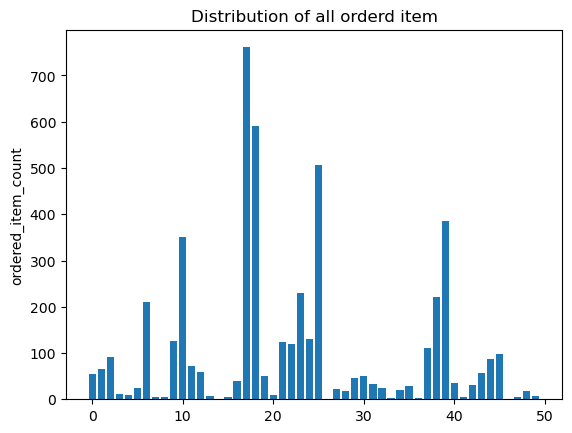

In [22]:
# 시각화
# 항목 이름 리스트를 생성합니다.
item_name_list = item_quantity.index.tolist()

# x 좌표를 설정합니다.
x_pos = np.arange(len(item_name_list))

# 주문된 상품 개수 리스트를 생성합니다.
order_cnt = item_quantity.values.tolist()

# 막대 그래프를 그립니다.
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [23]:
print(chipo.info())
print('-' * 50)
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
--------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [24]:
# 'item_price' 열의 각 값에 대해 첫 번째 문자(달러 기호)를 제거하고, 나머지 문자열을 실수(float)로 변환합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# 데이터프레임의 기술통계를 출력합니다.
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [25]:
# 'order_id'로 그룹화하여 'item_price'의 합을 계산하고, 그 합의 평균을 구합니다.
mean_order_price = chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [26]:
# 'order_id'로 그룹화하여 숫자형 열들의 합을 계산한 chipo_orderid_group을 생성합니다.
chipo_orderid_group = chipo.groupby('order_id').sum(numeric_only=True)

# 'item_price'가 10 이상인 주문들을 선택하여 results에 저장합니다.
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [27]:
# 주문 수량이 1인 항목들을 선택하여 chipo_one_item에 저장합니다.
chipo_one_item = chipo[chipo.quantity == 1]

# 'item_name'으로 그룹화한 후 최소값을 계산하여 price_per_item에 저장합니다.
price_per_item = chipo_one_item.groupby('item_name').min()

# 'item_price'를 기준으로 내림차순 정렬한 후 상위 10개를 출력합니다.
price_per_item.sort_values(by="item_price", ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


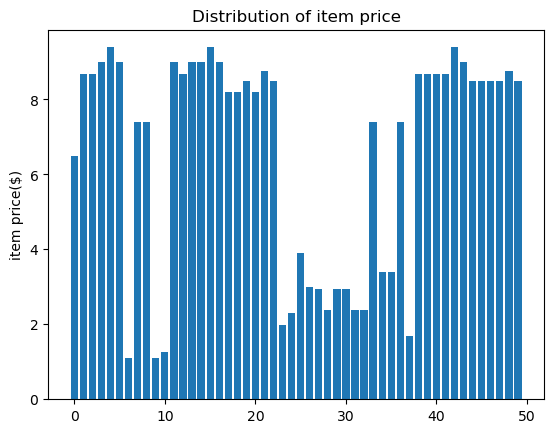

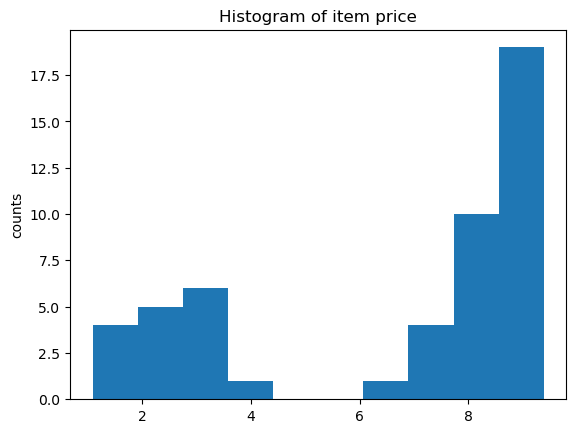

In [28]:
# 항목 이름 리스트를 생성합니다.
item_name_list = price_per_item.index.tolist()

# x 좌표를 설정합니다.
x_pos = np.arange(len(item_name_list))

# 각 항목의 가격을 가져옵니다.
item_price = price_per_item['item_price'].tolist()

# 가격 분포를 막대 그래프로 나타냅니다.
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

# 가격의 히스토그램을 그립니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [32]:
# 'order_id'로 그룹화하여 각 주문의 항목들을 합산한 후 'item_price'를 기준으로 내림차순 정렬한 상위 5개 주문을 출력합니다.
top_orders = chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]
top_orders

C:\Users\MYCOM\AppData\Local\Temp\ipykernel_4468\2538891118.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_orders = chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]


,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [30]:
# 'item_name'이 "Veggie Salad Bowl"인 항목들을 선택하여 chipo_salad에 저장합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]

# 'item_name'과 'order_id' 열을 기준으로 중복된 행을 제거합니다.
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

# chipo_salad의 길이를 출력합니다.
print(len(chipo_salad))

# chipo_salad의 처음 5개 행을 출력합니다.
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [31]:
# 'item_name'이 "Chicken Bowl"인 항목들을 선택하여 chipo_chicken에 저장합니다.
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']

# 'order_id'로 그룹화한 후 'quantity'의 합을 계산하여 chipo_chicken_ordersum에 저장합니다.
chipo_chicken_ordersum = chipo_chicken.groupby('order_id')['quantity'].sum()

# 'quantity'의 합이 2 이상인 주문들을 선택하여 chipo_chicken_result에 저장합니다.
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

# chipo_chicken_result의 길이를 출력합니다.
print(len(chipo_chicken_result))

# chipo_chicken_result의 처음 5개 행을 출력합니다.
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64